# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 27.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
425379,0.0757,0.0024,0.0049,0.0024,0.0049,0.0024,0.0293,0.0391,0.0024,0.0757,0,0,0,0
426227,0.0146,0.0049,0.0049,0.0024,0.0049,0.0024,0.0049,0.0024,0.0024,0.0732,0,0,0,0
343569,0.2051,0.0024,0.0049,0.0024,0.0024,0.0024,0.0977,0.2441,0.0024,0.0659,0,0,0,0
145444,0.5737,0.0024,0.0049,0.0024,0.0024,0.0049,0.0024,0.0293,0.0049,0.0659,3,0,6,0
191502,0.3027,0.0024,0.0049,0.0024,0.0049,0.0024,0.2051,0.9399,0.0049,0.0977,8,8,11,11


In [3]:
raw_data.shape

(466175, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466175 entries, 0 to 466174
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          466175 non-null  float64
 1   Emg2          466175 non-null  float64
 2   Emg3          466175 non-null  float64
 3   Emg4          466175 non-null  float64
 4   Emg5          466175 non-null  float64
 5   Emg6          466175 non-null  float64
 6   Emg7          466175 non-null  float64
 7   Emg8          466175 non-null  float64
 8   Emg9          466175 non-null  float64
 9   Emg10         466175 non-null  float64
 10  repetition    466175 non-null  int64  
 11  rerepetition  466175 non-null  int64  
 12  stimulus      466175 non-null  int64  
 13  restimulus    466175 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.8 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000,466175.000000
mean,0.283236,0.072650,0.090658,0.029487,0.011465,0.006873,0.088149,0.316144,0.062414,0.093988,3.169428,2.528250,5.618386,4.469551
std,0.413874,0.170137,0.257313,0.124365,0.037662,0.020497,0.222997,0.485001,0.177552,0.106385,3.484731,3.364871,6.582545,6.268219
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.043900,0.002400,0.004900,0.002400,0.004900,0.002400,0.004900,0.039100,0.002400,0.051300,0.000000,0.000000,0.000000,0.000000
50%,0.144000,0.004900,0.004900,0.004900,0.004900,0.002400,0.034200,0.139200,0.004900,0.068400,2.000000,0.000000,3.000000,0.000000
75%,0.341800,0.061000,0.048800,0.004900,0.004900,0.004900,0.090300,0.395500,0.031700,0.092800,6.000000,5.000000,10.000000,8.000000
max,4.643600,3.574200,4.636200,4.443400,1.276900,0.666500,4.638700,4.646000,4.636200,2.529300,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197577
2      15545
7      15537
8      15533
12     15528
4      15524
9      15487
11     15479
6      15478
5      15475
10     15447
3      15443
1      15442
13     10376
14     10367
17     10336
15     10316
16     10281
19      5197
21      5188
18      5180
23      5167
22      5142
20      5130
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

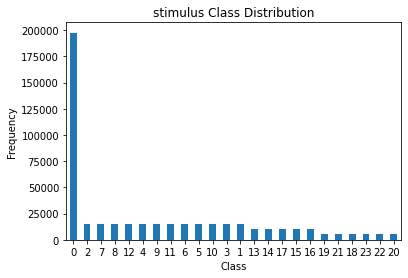

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
374845,0.2686,0.0049,0.0024,0.0049,0.0024,0.0049,0.0757,0.7910,0.0391,0.0684,5,5,15,15
419502,0.0977,0.0049,0.0049,0.0049,0.0049,0.0024,0.1221,0.0562,0.0049,0.0806,0,0,0,0
231211,0.0049,0.0049,0.0049,0.0024,0.0024,0.0049,0.0049,0.1270,0.0049,0.0513,0,0,0,0
98288,0.0098,0.0024,0.0049,0.0024,0.0049,0.0024,0.0049,0.1099,0.0049,0.0024,0,0,0,0
139296,0.3101,0.1025,0.0806,0.0049,0.0024,0.0049,0.0586,0.8350,0.0269,0.2881,6,6,5,5


In [12]:
raw_data.shape

(388472, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388472 entries, 0 to 466174
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          388472 non-null  float64
 1   Emg2          388472 non-null  float64
 2   Emg3          388472 non-null  float64
 3   Emg4          388472 non-null  float64
 4   Emg5          388472 non-null  float64
 5   Emg6          388472 non-null  float64
 6   Emg7          388472 non-null  float64
 7   Emg8          388472 non-null  float64
 8   Emg9          388472 non-null  float64
 9   Emg10         388472 non-null  float64
 10  repetition    388472 non-null  int64  
 11  rerepetition  388472 non-null  int64  
 12  stimulus      388472 non-null  int64  
 13  restimulus    388472 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.5 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 76.46695411545144


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     37017
           1       0.67      0.68      0.67      2324
           2       0.72      0.73      0.72      2103
           3       0.64      0.65      0.65      2358
           4       0.69      0.70      0.70      2374
           5       0.80      0.80      0.80      2160
           6       0.78      0.77      0.77      2347
           7       0.73      0.75      0.74      2304
           8       0.63      0.63      0.63      2562
           9       0.51      0.52      0.51      2658
          10       0.64      0.65      0.64      2191
          11       0.63      0.67      0.65      2482
          12       0.68      0.70      0.69      2430
          13       0.63      0.65      0.64      1486
          14       0.66      0.63      0.64      1457
          15       0.65      0.67      0.66      1441
          16       0.72      0.73      0.73      1524
 

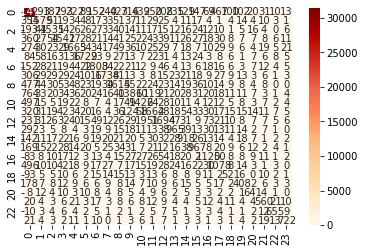

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.8888860287019758
MSE: 21.468807516571207
RMSE: 4.633444454892192


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.7668327465762174
Recall Score :  0.7646695411545145
f1_score :  0.765646967679843


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 81.89844906364631


Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     37017
           1       0.80      0.72      0.76      2324
           2       0.83      0.77      0.80      2103
           3       0.74      0.65      0.69      2358
           4       0.79      0.71      0.75      2374
           5       0.85      0.84      0.84      2160
           6       0.85      0.82      0.83      2347
           7       0.86      0.76      0.80      2304
           8       0.73      0.65      0.69      2562
           9       0.73      0.52      0.60      2658
          10       0.73      0.61      0.67      2191
          11       0.73      0.67      0.70      2482
          12       0.81      0.73      0.77      2430
          13       0.79      0.64      0.71      1486
          14       0.75      0.65      0.70      1457
          15       0.77      0.69      0.73      1441
          16       0.85      0.76      0.80      1524
 

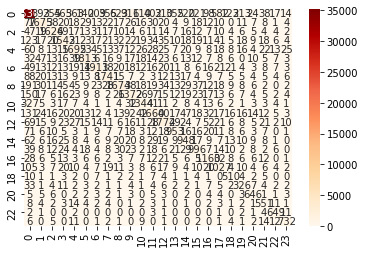

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.493995752622434
MSE: 17.096569920844328
RMSE: 4.1347998646662845


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8156069821256607
Recall Score :  0.8189844906364631
f1_score :  0.8127856519891277


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 86.57828689104832


Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91     37017
           1       0.89      0.77      0.82      2324
           2       0.93      0.79      0.86      2103
           3       0.88      0.74      0.81      2358
           4       0.89      0.79      0.84      2374
           5       0.93      0.90      0.92      2160
           6       0.92      0.87      0.89      2347
           7       0.89      0.80      0.84      2304
           8       0.81      0.70      0.75      2562
           9       0.84      0.56      0.67      2658
          10       0.82      0.67      0.74      2191
          11       0.84      0.77      0.80      2482
          12       0.89      0.82      0.85      2430
          13       0.86      0.73      0.79      1486
          14       0.85      0.79      0.82      1457
          15       0.82      0.77      0.79      1441
          16       0.92      0.86      0.89      1524
 

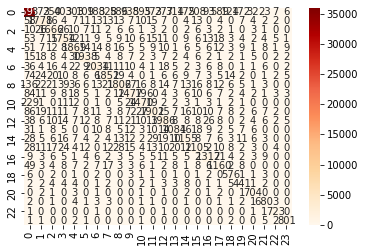

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 1.1308835832421649
MSE: 12.942943561361735
RMSE: 3.5976302702420293


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8678058341136503
Recall Score :  0.8657828689104833
f1_score :  0.8615281756335592


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[12:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 80.34879979406654


Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88     37017
           1       0.81      0.65      0.72      2324
           2       0.81      0.70      0.75      2103
           3       0.76      0.60      0.67      2358
           4       0.80      0.66      0.73      2374
           5       0.82      0.80      0.81      2160
           6       0.81      0.76      0.79      2347
           7       0.82      0.73      0.78      2304
           8       0.68      0.62      0.64      2562
           9       0.75      0.43      0.54      2658
          10       0.80      0.58      0.67      2191
          11       0.72      0.67      0.69      2482
          12       0.76      0.69      0.72      2430
          13       0.80      0.62      0.70      1486
          14       0.70      0.64      0.67      1457
          15       0.67      0.67      0.67      1441
          16       0.78      0.74      0.76      1524
 

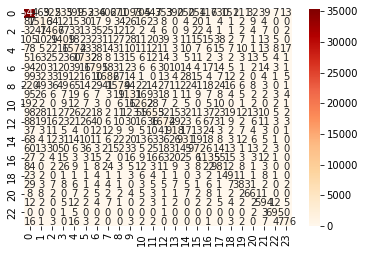

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.5675912220863633
MSE: 17.66425123881846
RMSE: 4.2028860606514735


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8009231055854886
Recall Score :  0.8034879979406654
f1_score :  0.7950798845750422


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 86.35176008752173


Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90     37017
           1       0.90      0.75      0.82      2324
           2       0.94      0.79      0.86      2103
           3       0.89      0.73      0.80      2358
           4       0.91      0.78      0.84      2374
           5       0.94      0.89      0.91      2160
           6       0.93      0.86      0.89      2347
           7       0.91      0.79      0.85      2304
           8       0.79      0.71      0.75      2562
           9       0.85      0.54      0.66      2658
          10       0.84      0.66      0.74      2191
          11       0.85      0.76      0.80      2482
          12       0.91      0.82      0.86      2430
          13       0.89      0.72      0.79      1486
          14       0.86      0.79      0.82      1457
          15       0.82      0.76      0.79      1441
          16       0.94      0.86      0.90      1524
 

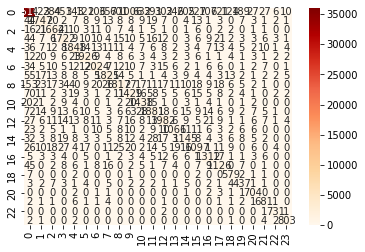

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 1.161953793680417
MSE: 13.37854430787052
RMSE: 3.6576692452804584


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.8673853115561367
Recall Score :  0.8635176008752172
f1_score :  0.8588887689134974
